# Lasso Regularization by `Mr. Harshit Dawar!`
* It is also known as L1 Regularization.
* In addition to Regularization, It is used for Feature Selection also because due to penalty it reduces the coefficients of some non-important Features to 0, so they will be eliminated right away!

In [1]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_boston

In [2]:
# Loading the Dataset!

X, y = load_boston(return_X_y = True)

In [3]:
# Predictors
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
# Predictors Shape
X.shape

(506, 13)

In [5]:
# Target Variable
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# Shape of Target Variable

y.shape

(506,)

In [7]:
# Generating Feature Selector!

Feature_Selector = SelectFromModel(Lasso(alpha = 35)) # Setting the Penalty to 35
Feature_Selector.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=35))

In [8]:
# Checking which Features are selected!

Feature_Selector.get_support()

array([False,  True, False, False, False, False, False, False, False,
        True, False,  True, False])

In [9]:
count = 0
for i in Feature_Selector.get_support():
    if i: count += 1

print("Total Features: {}\nFeatures left after applying Lasso Regularization: {}\nFeatures Dropped by Lasso Regilarization: {}".format(X.shape[1],  count, X.shape[1] - count))

Total Features: 13
Features left after applying Lasso Regularization: 3
Features Dropped by Lasso Regilarization: 10


In [10]:
# Printing the Features Coefficients!

Feature_Selector.estimator_.coef_

array([-0.        ,  0.02296878, -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.02056082,
       -0.        ,  0.01158594, -0.        ])

***As you can see, that only 3 features are there whose coefficient is != 0, they are selected only!***

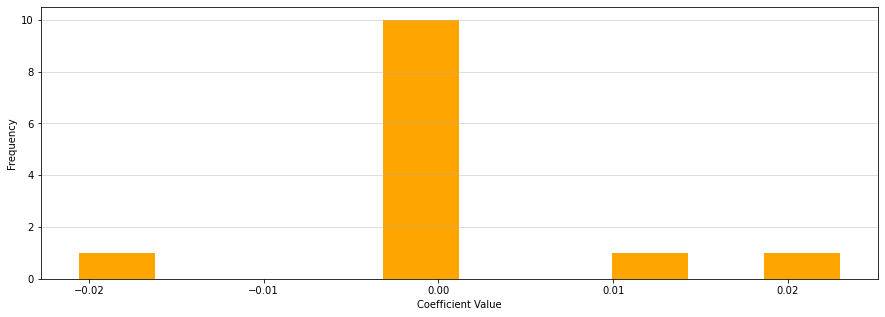

In [11]:
# Plotting the Histogram of the Coefficient Values! 

pd.Series(Feature_Selector.estimator_.coef_).plot.hist(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", animated = True, alpha = 0.5)
plt.xlabel("Coefficient Value")
plt.show()

In [12]:
# Transforming the Dataset!

X = Feature_Selector.transform(X)
X

array([[ 18.  , 296.  , 396.9 ],
       [  0.  , 242.  , 396.9 ],
       [  0.  , 242.  , 392.83],
       ...,
       [  0.  , 273.  , 396.9 ],
       [  0.  , 273.  , 393.45],
       [  0.  , 273.  , 396.9 ]])

# Congratulations, you have learned a new way of Selecting Features!